**Title:**

TYPE HERE

**Introduction:**

Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal

Clearly state the question you will try to answer with your project

Identify and describe the dataset that will be used to answer the question

TYPE HERE

**Preliminary exploratory data analysis:**

Demonstrate that the dataset can be read from the web into R 

Clean and wrangle your data into a tidy format

Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

[1] "READING TRAINING DATA + TIDYING DATA"


Study.Time.Goal,Repitition.Goal,Study.Time.Related,Exam.Performance.Related,Exam.Performance.Goal,Knowledge.Level
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.000,0.00,0.00,0.00,very_low
0.08,0.080,0.10,0.24,0.90,High
0.06,0.060,0.05,0.25,0.33,Low
0.10,0.100,0.15,0.65,0.30,Middle
0.08,0.080,0.08,0.98,0.24,Low
0.09,0.150,0.40,0.10,0.66,Middle
0.10,0.100,0.43,0.29,0.56,Middle
0.15,0.020,0.34,0.40,0.01,very_low
0.20,0.140,0.35,0.72,0.25,Low


[1] "USEFUL STATISTICS"


Study.Time.Goal,Repitition.Goal,Exam.Performance.Goal
<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4585388


`summarise()` ungrouping output (override with `.groups` argument)



Knowledge.Level,Number
<chr>,<int>
High,63
Low,83
Middle,88
very_low,24


[1] 0

[1] "PRELIMINARY VISUALIZATION"


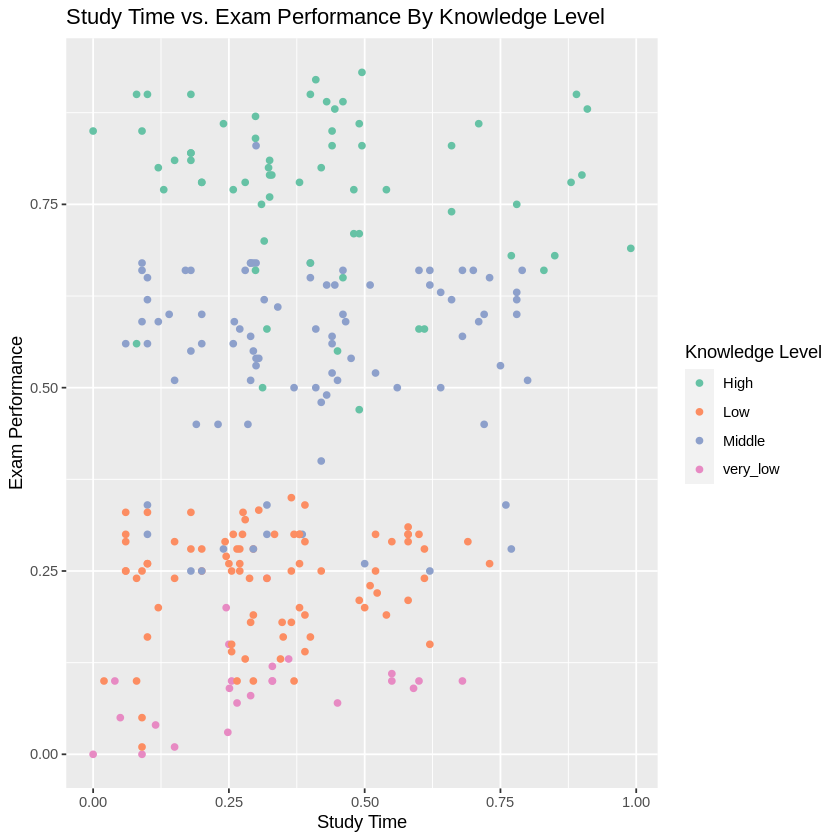

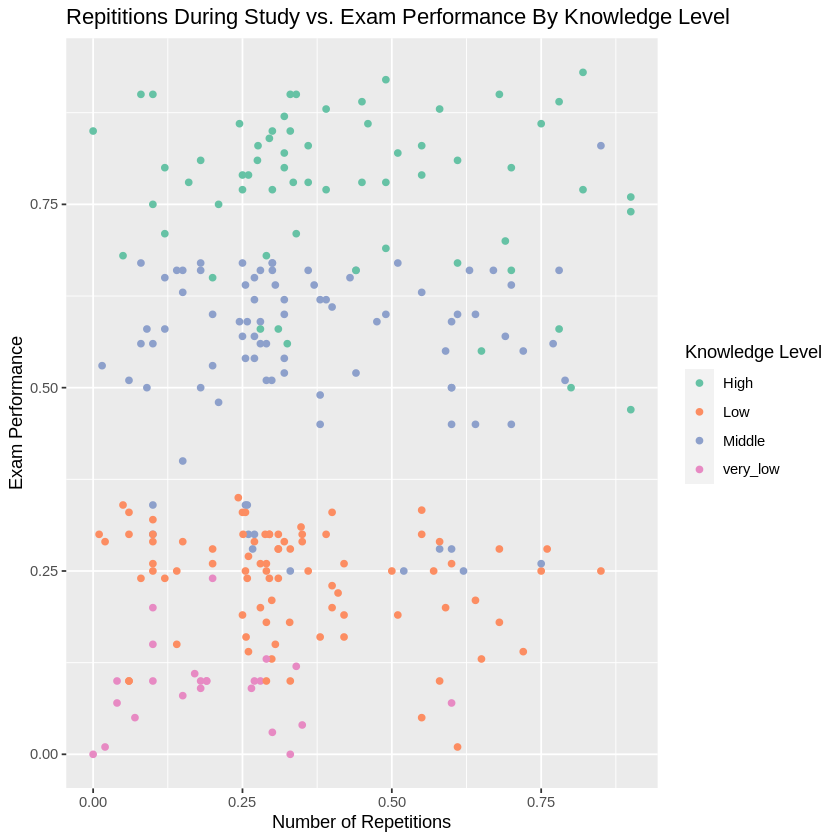

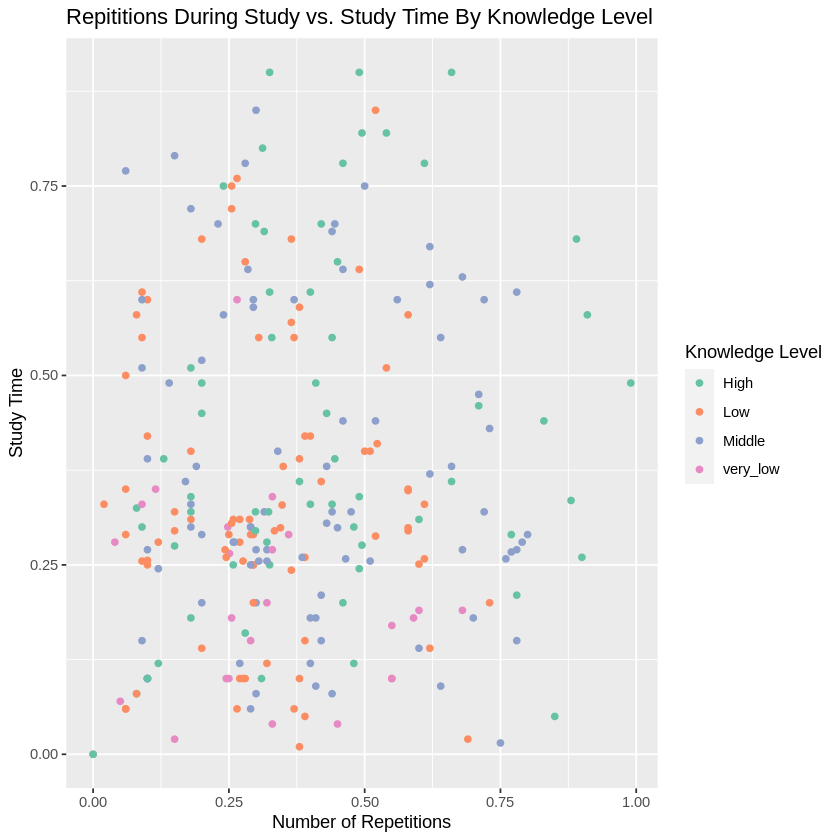

In [32]:
library(tidyverse)
library(tidymodels)
library(readxl)
library(RColorBrewer)

set.seed(99)

## -----------------------------------------------
## |                                             |
## |   READING TRAINING DATA + TIDYING DATA      |
## |                                             |
## -----------------------------------------------
print("READING TRAINING DATA + TIDYING DATA")

## reading the Training_Data data frame from the User Knowledge .xls file into R

user_training <- read_excel("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet = 2, range = "A1:F259")
# user_training

## renaming the columns to more descriptive names

user_training <- rename(user_training,
                        Study.Time.Goal = STG,
                        Repitition.Goal = SCG,
                        Study.Time.Related = STR,
                        Exam.Performance.Related = LPR,
                        Exam.Performance.Goal = PEG,
                        Knowledge.Level = UNS)
# user_training


## converting the user knowledge column to a factor

user_training %>% mutate(Knowledge.Level = as_factor(Knowledge.Level))
# user_training


## -------------------------------
## |                             |
## |   USEFUL STATISTICS         |
## |                             |
## -------------------------------
print("USEFUL STATISTICS")

## means of predictor variables (Study.Time.Goal, Repetition.Goal, Exam.Performance.Goal)

predictor_mean <- user_training %>% select(Study.Time.Goal, Repitition.Goal, Exam.Performance.Goal) %>% map_df(mean)
predictor_mean


## number of observations for target variable (Knowledge.Level)

targ_obs <- user_training %>% group_by(Knowledge.Level) %>% summarize(Number = n())
targ_obs


## number of rows with missing values

number_missing <- sum(is.na(user_training))
number_missing


## ---------------------------------------
## |                                     |
## |   PRELIMINARY VISUALIZATION         |
## |                                     |
## ---------------------------------------
print("PRELIMINARY VISUALIZATION")

## PART 1 - scatterplot of study time vs. exam performance, coloured by knowledge level

study_vs_exam <- ggplot(user_training, 
                        aes(x = Study.Time.Goal, y = Exam.Performance.Goal, colour = Knowledge.Level)) + 
                        geom_point() + 
                        labs(x = "Study Time", y = "Exam Performance", colour = "Knowledge Level") + 
                        ggtitle("Study Time vs. Exam Performance By Knowledge Level") + 
                        scale_color_brewer(palette = "Set2")
study_vs_exam


## PART 2 - scatterplot of repetition metric vs. exam performance, coloured by knowledge level

repetition_vs_exam <- ggplot(user_training, 
                        aes(x = Repitition.Goal, y = Exam.Performance.Goal, colour = Knowledge.Level)) + 
                        geom_point() + 
                        labs(x = "Number of Repetitions", y = "Exam Performance", colour = "Knowledge Level") + 
                        ggtitle("Repititions During Study vs. Exam Performance By Knowledge Level") +
                        scale_color_brewer(palette = "Set2")
repetition_vs_exam


## PART 3 - scatterplot between study time and repeition metric, coloured by knowledge level
# Might want to put in? Depends on what our final question is -- more on this later.

study_and_repetition <- ggplot(user_training, 
                        aes(x = Study.Time.Goal, y = Repitition.Goal, colour = Knowledge.Level)) + 
                        geom_point() + 
                        labs(x = "Number of Repetitions", y = "Study Time", colour = "Knowledge Level") + 
                        ggtitle("Repititions During Study vs. Study Time By Knowledge Level") +
                        scale_color_brewer(palette = "Set2")
study_and_repetition


**Methods:**

Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

Describe at least one way that you will visualize the results

TYPE HERE

**Expected outcomes and significance:**

What do you expect to find?

What impact could such findings have?

What future questions could this lead to?


TYPE HERE